<a href="https://colab.research.google.com/github/wangechi01-a/AirQo-African-Air-Quality/blob/main/Flight_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost
!pip install optuna

# Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import catboost as catt
import lightgbm as lgb
import xgboost as xgb
import optuna

import warnings
warnings.filterwarnings('ignore')


# Load the Datasets

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flight Delay/Train (5).csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flight Delay/Test (5).csv')
ss = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flight Delay/SampleSubmission (5).csv')

In [ ]:
# View the first few rows of the train dataset
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [ ]:
# View the first few rows of the test dataset
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [ ]:
#Check the shape of the train,test datasets
train.shape,test.shape

((107833, 10), (9333, 9))

In [ ]:
#Check for more information in the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9333 non-null   object
 1   DATOP   9333 non-null   object
 2   FLTID   9333 non-null   object
 3   DEPSTN  9333 non-null   object
 4   ARRSTN  9333 non-null   object
 5   STD     9333 non-null   object
 6   STA     9333 non-null   object
 7   STATUS  9333 non-null   object
 8   AC      9333 non-null   object
dtypes: object(9)
memory usage: 656.4+ KB


VARIABLE DEFINIFION:

DATOP - Date of flight

FLTID - Flight number

DEPSTN - Departure point

ARRSTN - Arrival point

STD - Scheduled Time departure

STA - Scheduled Time arrival

STATUS - Flight status

ETD - Expected Time departure

ETA - Expected Time arrival

ATD - Actual Time of Departure

ATA - Actual Time of arrival

DELAY1 - Delay code 1

DUR1 - delay time 1

DELAY2 - Delay code 2

DUR2 - delay time 2

DELAY3 - Delay code 3

DUR3 - delay time 3

DELAY4 - Delay code 4

DUR4 - delay time 4

AC - Aircraft Code

In [ ]:
#Checking for missing values in the train
train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

There are no missing values in the train dataset

In [ ]:
#Checking for missing values in the test data
test.isnull().sum() * 100 / len(test)

ID        0.0
DATOP     0.0
FLTID     0.0
DEPSTN    0.0
ARRSTN    0.0
STD       0.0
STA       0.0
STATUS    0.0
AC        0.0
dtype: float64

There are no missing values in the test data

In [ ]:
#Checking for statistics
train.describe().T

,count,mean,std,min,25%,50%,75%,max
target,107833.0,48.733013,117.135562,0.0,0.0,14.0,43.0,3451.0


In [ ]:
train.describe(include='object').T

,count,unique,top,freq
ID,107833,107833,train_id_0,1
DATOP,107833,1011,2018-08-31,183
FLTID,107833,1861,WKL 0000,3105
DEPSTN,107833,132,TUN,42522
ARRSTN,107833,128,TUN,42572
STD,107833,81697,2017-06-23 06:00:00,8
STA,107833,85136,2016-01-19 01.00.00,6
STATUS,107833,5,ATA,93679
AC,107833,68,TU 320IMU,4724


In [ ]:
train['target'].isnull().sum()

0

# Visualization

<Axes: xlabel='target', ylabel='Density'>

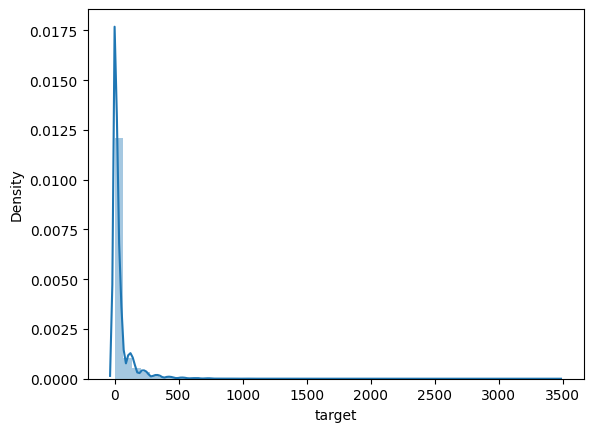

In [ ]:
sns.distplot(train['target'])

<Axes: xlabel='target', ylabel='Density'>

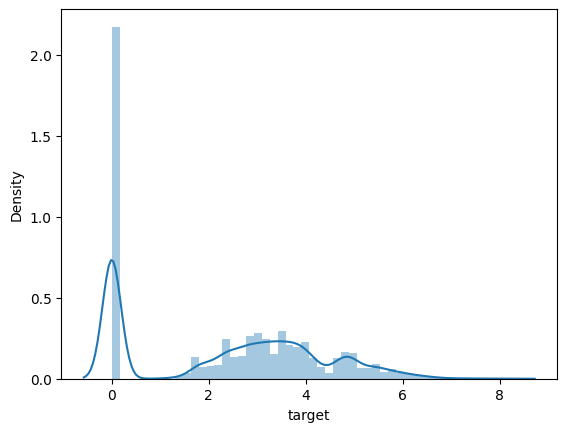

In [ ]:
target_no_nan = train['target'].dropna()
sns.distplot(np.log(target_no_nan + 1))

In [ ]:
train['target'].describe()

count    107833.000000
mean         48.733013
std         117.135562
min           0.000000
25%           0.000000
50%          14.000000
75%          43.000000
max        3451.000000
Name: target, dtype: float64

<Axes: ylabel='target'>

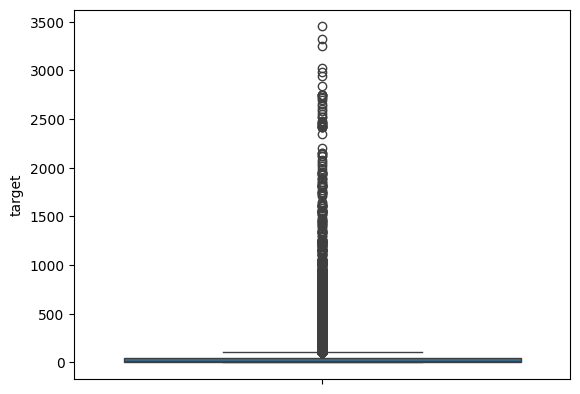

In [ ]:
sns.boxplot(train['target'])

<Axes: xlabel='STATUS', ylabel='count'>

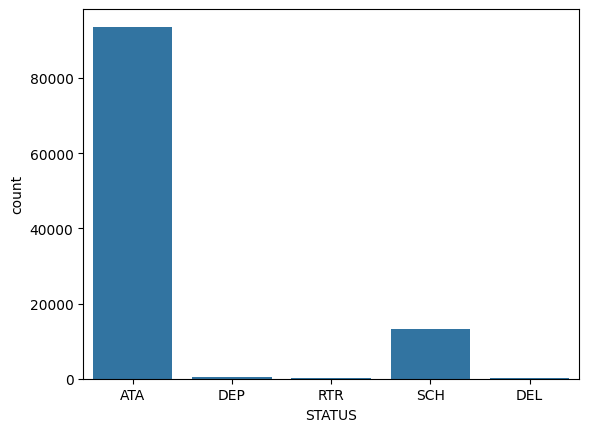

In [ ]:
sns.countplot(x='STATUS',data=train)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'TU 32AIMN'),
  Text(1, 0, 'TU 31BIMO'),
  Text(2, 0, 'TU 736IOK'),
  Text(3, 0, 'TU 320IMU'),
  Text(4, 0, 'TU 736IOP'),
  Text(5, 0, 'TU 32AIMH'),
  Text(6, 0, 'TU 32AIMI'),
  Text(7, 0, 'TU 32AIMC'),
  Text(8, 0, 'TU 31AIMK'),
  Text(9, 0, 'TU 32AIMF'),
  Text(10, 0, 'TU 32AIMP'),
  Text(11, 0, 'TU 320IMR'),
  Text(12, 0, 'TU 332IFN'),
  Text(13, 0, 'TU 31AIMJ'),
  Text(14, 0, 'TU 320IMT'),
  Text(15, 0, 'TU 736IOL'),
  Text(16, 0, 'TU 320IMW'),
  Text(17, 0, 'TU 736IOQ'),
  Text(18, 0, 'TU CR9ISA'),
  Text(19, 0, 'TU 320IMS'),
  Text(20, 0, 'TU 31BIMQ'),
  Text(21, 0, 'TU 736ION'),
  Text(22, 0, 'TU 32AIML')])

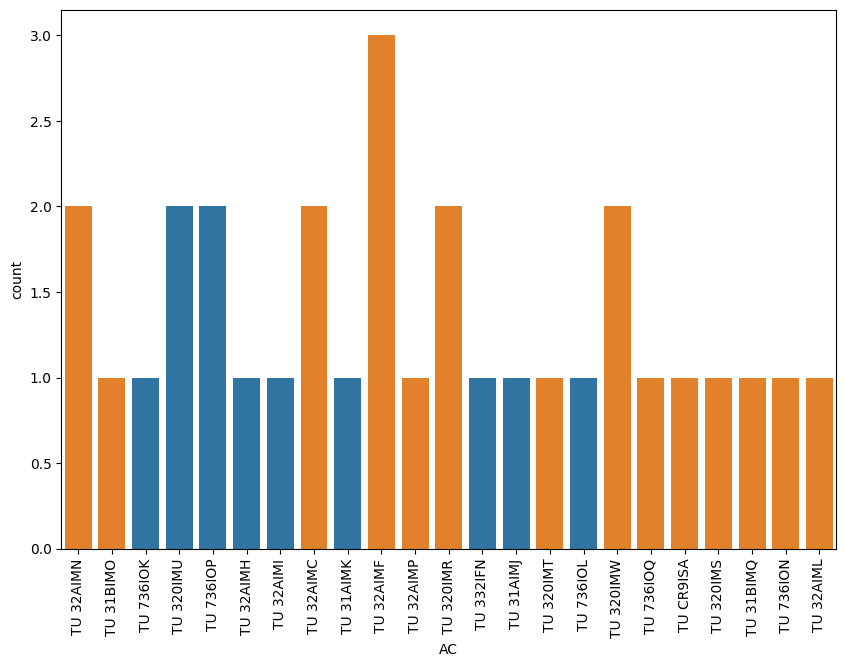

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='AC',data=train.head(20)), sns.countplot(x='AC',data=test.head(20))

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'CMN'),
  Text(1, 0, 'MXP'),
  Text(2, 0, 'TUN'),
  Text(3, 0, 'DJE'),
  Text(4, 0, 'TLS'),
  Text(5, 0, 'IST'),
  Text(6, 0, 'ORY'),
  Text(7, 0, 'MIR'),
  Text(8, 0, 'FRA'),
  Text(9, 0, 'BEY'),
  Text(10, 0, 'CDG'),
  Text(11, 0, 'BCN'),
  Text(12, 0, 'LYS'),
  Text(13, 0, 'ORN'),
  Text(14, 0, 'LIS'),
  Text(15, 0, 'NBE'),
  Text(16, 0, 'SFA')])

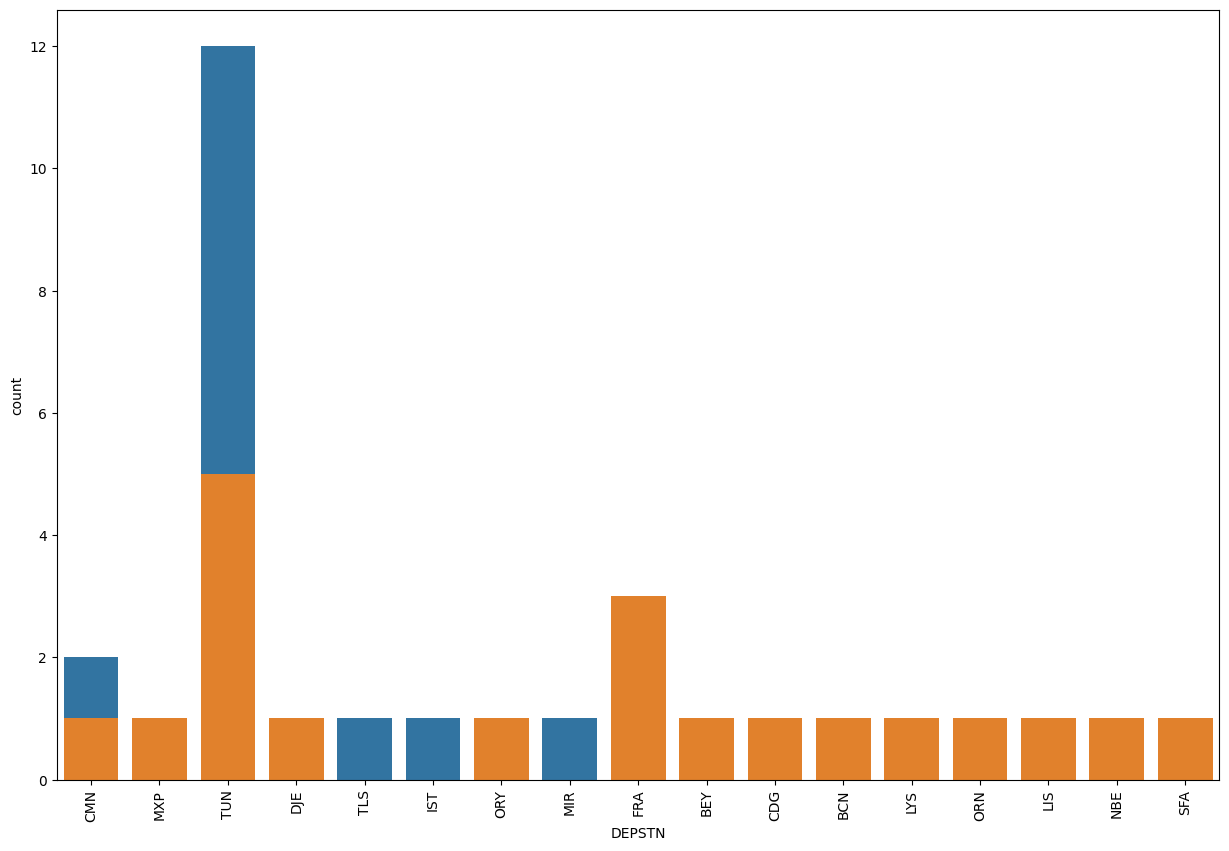

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='DEPSTN',data=train.head(20)), sns.countplot(x='DEPSTN',data=test.head(20))
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'TUN'),
  Text(1, 0, 'IST'),
  Text(2, 0, 'NTE'),
  Text(3, 0, 'ALG'),
  Text(4, 0, 'BCN'),
  Text(5, 0, 'ORY'),
  Text(6, 0, 'FCO'),
  Text(7, 0, 'NCE'),
  Text(8, 0, 'MRS'),
  Text(9, 0, 'MED'),
  Text(10, 0, 'FRA'),
  Text(11, 0, 'BRU'),
  Text(12, 0, 'DJE'),
  Text(13, 0, 'BKO'),
  Text(14, 0, 'MIR'),
  Text(15, 0, 'SFA'),
  Text(16, 0, 'NBE'),
  Text(17, 0, 'BLQ')])

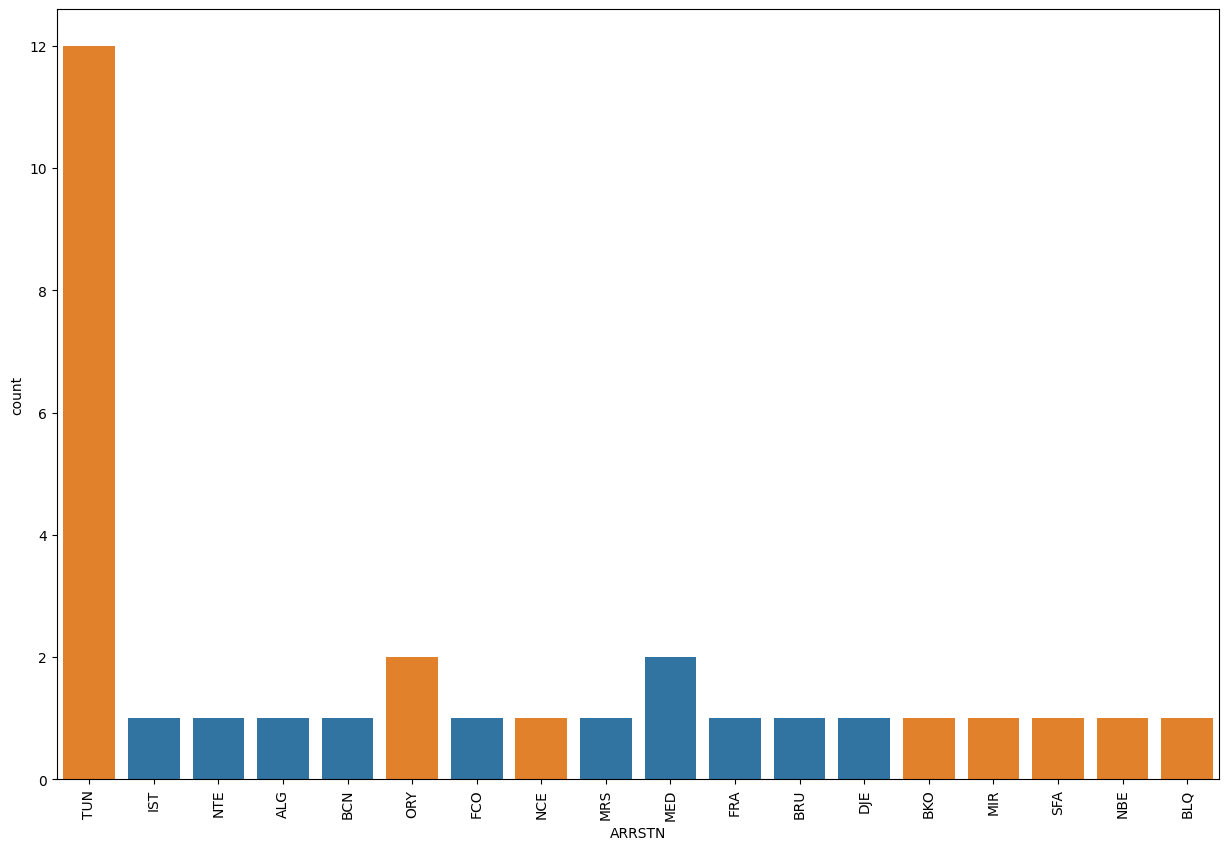

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='ARRSTN',data=train.head(20)), sns.countplot(x='ARRSTN',data=test.head(20))
plt.xticks(rotation=90)

In [ ]:
pr(train)

NameError: name 'pr' is not defined